<a href="https://colab.research.google.com/github/alinaiil/ITMO-applied-mathematics-4sem/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Выполнили: Ильясова Алина, Воробьева Милана

Группа: М32021

---

Лабораторная работа #3
"Методы спуска"

Мы будем осуществлять оптимизацию в направлении наискорейшего спуска, которое задаётся антиградиентом. Основная проблема — выбор шага $λ$.

$x_{n+1}=x_n-λ∇f(x_n)$

Условие останова:

$||x_{n+1}-x_n||≤ɛ$, где $ɛ$ — доверительный интервал.

Рассмотрим работу методов оптимизации на двух функциях:



1.   $f_1(x,y)=x^2+y^2$
2.   $f_2(x,y)=\frac{x^2}{2}+\frac{y^2}{4}$



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f1(x):
  return x[0]*x[0]+x[1]*x[1]

def f2(x):
  return x[0]*x[0]/2+x[1]*x[1]/4

def grad(f, x):
  if (f == f1):
    return np.array([2*x[0], 2*x[1]])
  if (f == f2):
    return np.array([x[0], 0.5*x[1]])

**Градиентный спуск с постоянным шагом**

$λ = const$

In [ ]:
def gradient_descent_const_step(n, f, x0, lr, eps):
  cur = np.array(x0, dtype=float)
  prev = cur
  iter = 0
  xn = np.array(x0, dtype=float)
  while (iter < n):
    prev = cur
    gradient = grad(f, prev)
    if np.sqrt((lr*gradient)[0]**2 + (lr*gradient)[1]**2) < eps:
      return xn, iter
    cur = prev - lr*gradient
    xn = np.append(xn, cur, axis=0)
    iter = iter + 1

  return xn, iter

Number of iterations: 119
Answer (x, y): (-3.5880511311094635e-05, -3.5880511311094635e-05)


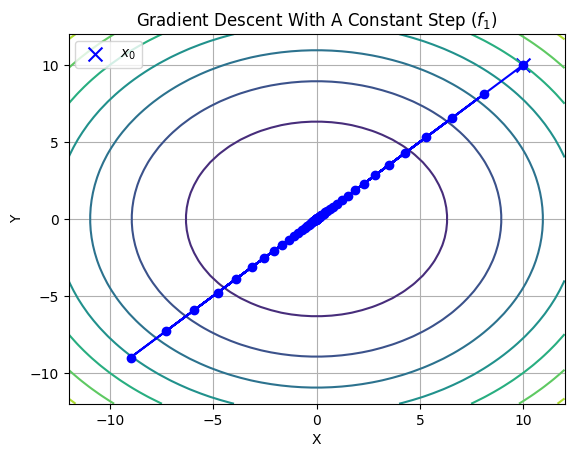

Number of iterations: 17
Answer (x, y): (7.629394531250064e-22, 0.00017486712019356036)


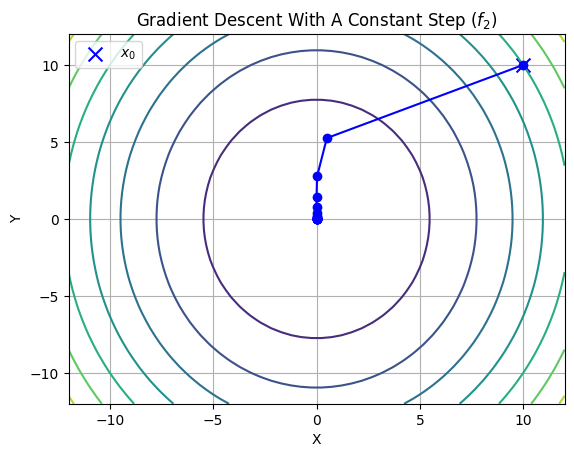

In [ ]:
a = np.array([10, 10])
ans11, ans_iter11 = gradient_descent_const_step(10000, f1, a, 0.95, 0.0001)
print("Number of iterations: " + str(ans_iter11))
print("Answer (x, y): (" + str(ans11[-2]) + ", " + str(ans11[-1]) + ")")
plt.title("Gradient Descent With A Constant Step ($f_1$)")
ax = plt.gca()
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.grid()
x = np.linspace(-12, 12, 50)
y = np.linspace(-12, 12, 50)
x, y = np.meshgrid(x, y)
z = f1(np.array([x, y]))
plt.contour(x, y, z, alpha = 1)
plt.scatter(a[0], a[1], marker="x", color="blue", label="$x_0$", s=100)
plt.legend()
plt.plot(ans11[0::2], ans11[1::2], marker="o", color="blue", label="descent")
plt.show()
a = np.array([10, 10])
ans12, ans_iter12 = gradient_descent_const_step(10000, f2, a, 0.95, 0.0001)
print("Number of iterations: " + str(ans_iter12))
print("Answer (x, y): (" + str(ans12[-2]) + ", " + str(ans12[-1]) + ")")
plt.title("Gradient Descent With A Constant Step ($f_2$)")
ax = plt.gca()
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.grid()
x = np.linspace(-12, 12, 50)
y = np.linspace(-12, 12, 50)
x, y = np.meshgrid(x, y)
z = f2(np.array([x, y]))
plt.contour(x, y, z, alpha = 1)
plt.scatter(a[0], a[1], marker="x", color="blue", label="$x_0$", s=100)
plt.legend()
plt.plot(ans12[0::2], ans12[1::2], marker="o", color="blue", label="descent")
plt.show()

**Спуск с дроблением шага**

$f(x_{n+1})=f(x_n-λ∇f(x_n))≤f(x_n)-ɛλ||∇f(x_n)||^2$, $ɛ∈(0, 1)$

Иначе: $λ=λ \cdot δ$, $δ∈(0, 1)$

In [ ]:
def step_crushing(n, f, x0, lr, delta, eps_tolerance, eps):
  cur = np.array(x0, dtype=float)
  prev = cur
  iter = 0
  xn = np.array(x0, dtype=float)
  fxn = f(x0)
  while (iter < n):
    prev = cur
    gradient = grad(f, prev)
    if np.sqrt((lr*gradient)[0]**2 + (lr*gradient)[0]**2) < eps_tolerance:
      return xn, iter
    fxn = f(prev)
    fxn1 = f(prev - lr*gradient)
    square = gradient[0]**2 + gradient[1]**2
    if (fxn1 - fxn > -1 * eps * lr * square):
      lr = lr*delta
    cur = prev - lr*grad(f,prev)
    xn = np.append(xn, cur, axis=0)
    iter = iter + 1

  return xn, iter

Number of iterations: 12
Answer (x, y): (1.8418364767961386e-06, 1.8418364767961386e-06)


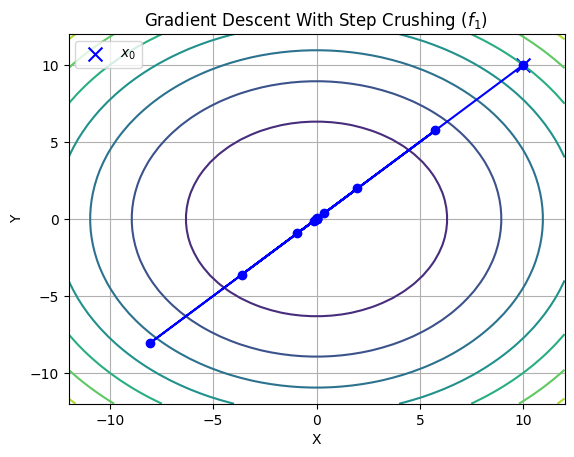

Number of iterations: 10
Answer (x, y): (1.0041072237034074e-05, 0.10761909902742951)


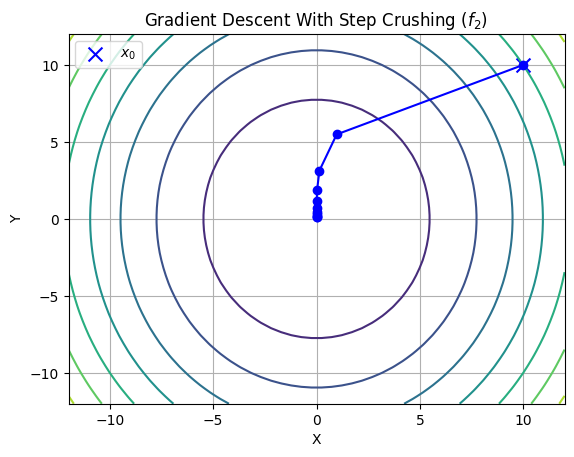

In [ ]:
a = np.array([10, 10])
ans21, ans_iter21 = step_crushing(1000, f1, a, 0.95, 0.95, 0.00001, 0.95)
print("Number of iterations: " + str(ans_iter21))
print("Answer (x, y): (" + str(ans21[-2]) + ", " + str(ans21[-1]) + ")")
plt.title("Gradient Descent With Step Crushing ($f_1$)")
ax = plt.gca()
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.grid()
x = np.linspace(-12, 12, 50)
y = np.linspace(-12, 12, 50)
x, y = np.meshgrid(x, y)
z = f1(np.array([x, y]))
plt.contour(x, y, z, alpha = 1)
plt.scatter(a[0], a[1], marker="x", color="blue", label="$x_0$", s=100)
plt.legend()
plt.plot(ans21[0::2], ans21[1::2], marker="o", color="blue", label="descent")
plt.show()
a = np.array([10, 10])
ans22, ans_iter22 = step_crushing(1000, f2, a, 0.95, 0.95, 0.00001, 0.95)
print("Number of iterations: " + str(ans_iter22))
print("Answer (x, y): (" + str(ans22[-2]) + ", " + str(ans22[-1]) + ")")
plt.title("Gradient Descent With Step Crushing ($f_2$)")
ax = plt.gca()
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.grid()
x = np.linspace(-12, 12, 50)
y = np.linspace(-12, 12, 50)
x, y = np.meshgrid(x, y)
z = f2(np.array([x, y]))
plt.contour(x, y, z, alpha = 1)
plt.scatter(a[0], a[1], marker="x", color="blue", label="$x_0$", s=100)
plt.legend()
plt.plot(ans22[0::2], ans22[1::2], marker="o", color="blue", label="descent")
plt.show()

**Метод наискорейшего спуска**

$λ=arg_{λ∈[0,∞)}min(f(x_n)-λ∇f(x_n))$

На каждом шаге решаем задачу одномерной оптимизации.

In [ ]:
def get_u(x, w, v, fx, fw, fv):
    if 2 * ((w - x) * (fw - fv) - (w - v) * (fw - fx)) == 0:
        return None
    else:
        return w - ((w - x) ** 2 * (fw - fv) - (w - v) ** 2 * (fw - fx)) / (
                2 * ((w - x) * (fw - fv) - (w - v) * (fw - fx)))


def brent(f, a: float, b: float, eps: float):
    K = (3 - np.sqrt(5)) / 2
    x = w = v = (a + b) / 2
    fx = fw = fv = f(x)
    d = e = b - a
    while (b - a) > 2*eps:
        g = e
        e = d
        u_test = get_u(x, w, v, fx, fw, fv)
        if u_test is not None and a + eps <= u_test <= b - eps and abs(u_test - x) < g / 2:
            u = u_test
            d = np.abs(u - x)
        else:
            if x < (a + b) / 2:
                u = x + K * (b - x)
                d = b - x
            else:
                u = x - K * (x - a)
                d = x - a
        fu = f(u)
        if fu <= fx:
            if u >= x:
                a = x
            else:
                b = x
            v = w
            w = x
            x = u
            fv = fw
            fw = fx
            fx = fu
        else:
            if u >= x:
                b = u
            else:
                a = u
            if fu < fw or w == x:
                v = w
                w = u
                fv = fw
                fw = fu
            elif fu <= fv or v == w or v == x:
                v = u
                fv = fu
    return (a + b) / 2

In [ ]:
def quickest_descent(n, f, x0, lr, eps):
  cur = np.array(x0, dtype=float)
  prev = cur
  iter = 0
  xn = np.array(x0, dtype=float)
  while (iter < n):
    prev = cur
    gradient = grad(f, prev)
    lr = brent(lambda lr: f(prev-lr*grad(f, prev)), 0, 1e5, eps)
    if np.sqrt((lr*gradient)[0]**2 + (lr*gradient)[1]**2) < eps:
      return xn, iter
    cur = prev - lr*gradient
    xn = np.append(xn, cur, axis=0)
    iter = iter + 1
  return xn, iter

Number of iterations: 2
Answer (x, y): (1.593978506912036e-09, 1.593978506912036e-09)


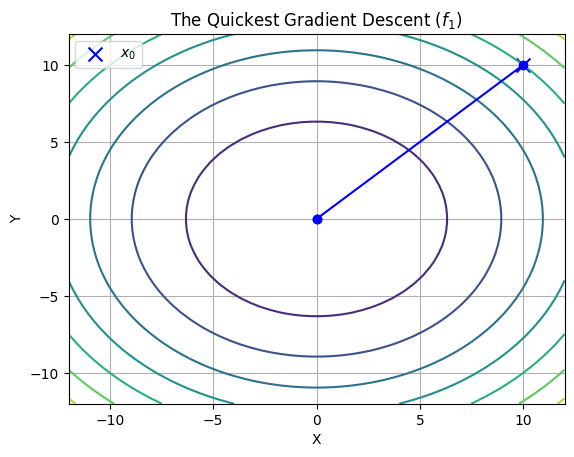

Number of iterations: 11
Answer (x, y): (-2.4755105721554933e-06, 9.904849773058747e-06)


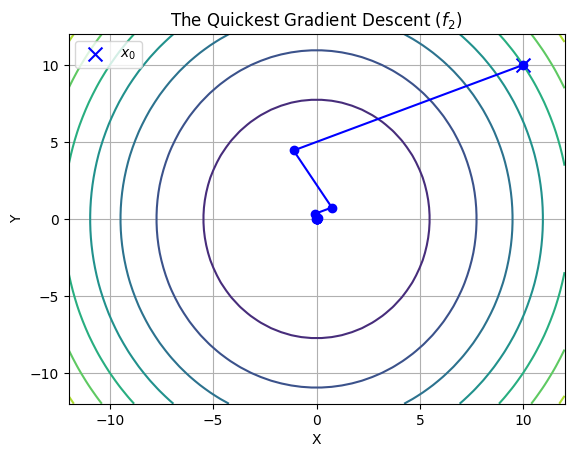

In [ ]:
a = np.array([10, 10])
ans31, ans_iter31 = quickest_descent(1000, f1, a, 0.95, 0.00001)
print("Number of iterations: " + str(ans_iter31))
print("Answer (x, y): (" + str(ans31[-2]) + ", " + str(ans31[-1]) + ")")
plt.title("The Quickest Gradient Descent ($f_1$)")
ax = plt.gca()
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.grid()
x = np.linspace(-12, 12, 50)
y = np.linspace(-12, 12, 50)
x, y = np.meshgrid(x, y)
z = f1(np.array([x, y]))
plt.contour(x, y, z, alpha = 1)
plt.scatter(a[0], a[1], marker="x", color="blue", label="$x_0$", s=100)
plt.legend()
plt.plot(ans31[0::2], ans31[1::2], marker="o", color="blue", label="descent")
plt.show()
a = np.array([10, 10])
ans32, ans_iter32 = quickest_descent(1000, f2, a, 0.95, 0.00001)
print("Number of iterations: " + str(ans_iter32))
print("Answer (x, y): (" + str(ans32[-2]) + ", " + str(ans32[-1]) + ")")
plt.title("The Quickest Gradient Descent ($f_2$)")
ax = plt.gca()
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.grid()
x = np.linspace(-12, 12, 50)
y = np.linspace(-12, 12, 50)
x, y = np.meshgrid(x, y)
z = f2(np.array([x, y]))
plt.contour(x, y, z, alpha = 1)
plt.scatter(a[0], a[1], marker="x", color="blue", label="$x_0$", s=100)
plt.legend()
plt.plot(ans32[0::2], ans32[1::2], marker="o", color="blue", label="descent")
plt.show()

**Метод сопряжённых градиентов**

$x_{n+1}=x_n+α_np_n$,

$n=0,1,...$

$p_0=-∇f(x_0)$

$λ_n=arg_{λ∈[0,+∞)}min(f(x_n-λp_n))$

$p_{n+1}=-∇f(x_{n+1})+β_np_n$

$β_{n}=\frac{||∇f(x_{n+1})||^2}{||∇f(x_n)||^2}$

In [ ]:
def conjugate_gradient(n, f, x0, eps):
  cur = np.array(x0, dtype=float)
  p = np.array(-grad(f, x0), dtype=float)
  iter = 0
  xn = np.array(x0, dtype=float)
  while (iter < n):
    prev = cur
    lr = brent(lambda lr: f(prev+lr*p), 0, 1e5, eps)
    if np.sqrt((lr*p)[0]**2 + (lr*p)[1]**2) < eps:
      return xn, iter
    cur = prev + lr*p
    square_up = grad(f, cur)[0]**2+grad(f, cur)[1]**2
    square_down = grad(f, prev)[0]**2+grad(f, prev)[1]**2
    beta = square_up/square_down
    p = -grad(f, cur) + beta*p
    xn = np.append(xn, cur, axis=0)
    iter = iter + 1
  return xn, iter

Number of iterations: 2
Answer (x, y): (7.488326330057967e-08, 7.488326330057967e-08)


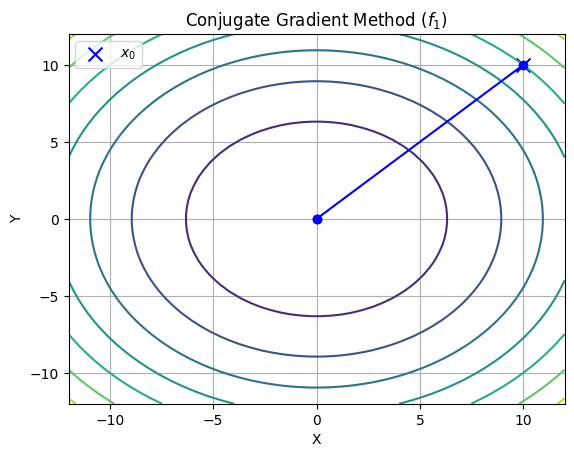

Number of iterations: 4
Answer (x, y): (1.8361312272485372e-08, 1.0755356062496857e-08)


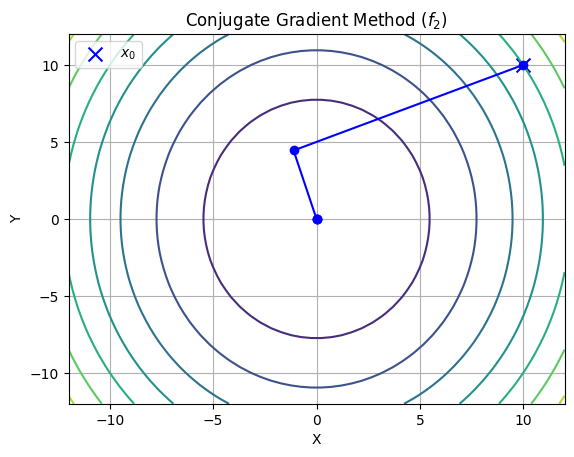

In [ ]:
a = np.array([10, 10])
ans41, ans_iter41 = conjugate_gradient(1000, f1, a, 0.0001)
print("Number of iterations: " + str(ans_iter41))
print("Answer (x, y): (" + str(ans41[-2]) + ", " + str(ans41[-1]) + ")")
plt.title("Conjugate Gradient Method ($f_1$)")
ax = plt.gca()
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.grid()
x = np.linspace(-12, 12, 50)
y = np.linspace(-12, 12, 50)
x, y = np.meshgrid(x, y)
z = f1(np.array([x, y]))
plt.contour(x, y, z, alpha = 1)
plt.scatter(a[0], a[1], marker="x", color="blue", label="$x_0$", s=100)
plt.legend()
plt.plot(ans41[0::2], ans41[1::2], marker="o", color="blue", label="descent")
plt.show()
a = np.array([10, 10])
ans42, ans_iter42 = conjugate_gradient(1000, f2, a, 0.0001)
print("Number of iterations: " + str(ans_iter42))
print("Answer (x, y): (" + str(ans42[-2]) + ", " + str(ans42[-1]) + ")")
plt.title("Conjugate Gradient Method ($f_2$)")
ax = plt.gca()
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.grid()
x = np.linspace(-12, 12, 50)
y = np.linspace(-12, 12, 50)
x, y = np.meshgrid(x, y)
z = f2(np.array([x, y]))
plt.contour(x, y, z, alpha = 1)
plt.scatter(a[0], a[1], marker="x", color="blue", label="$x_0$", s=100)
plt.legend()
plt.plot(ans42[0::2], ans42[1::2], marker="o", color="blue", label="descent")
plt.show()

Сравним работу методов по количеству итераций, которые им пришлось произвести.
Первая строчка ─ первая функция, вторая строчка ─ вторая функция.

In [ ]:
from prettytable import PrettyTable
iteration_table = PrettyTable()
iteration_table.field_names = ["Constant Step", "Step Crushing", "Quickest", "Conjugate Gradients"]
iteration_table.add_row([ans_iter11, ans_iter21, ans_iter31, ans_iter41])
iteration_table.add_row([ans_iter12, ans_iter22, ans_iter32, ans_iter42])
print(iteration_table)

+---------------+---------------+----------+---------------------+
| Constant Step | Step Crushing | Quickest | Conjugate Gradients |
+---------------+---------------+----------+---------------------+
|      119      |       12      |    2     |          2          |
|       17      |       10      |    11    |          4          |
+---------------+---------------+----------+---------------------+


Как можно заметить, метод градиентного спуска с постоянным шагом показывает худшие результаты, и на его исполнение требуется больше всего итераций. Также стоит отметить, что метод градиентного спуска с постоянным шагом может работать как за очень большое количество итераций (а также может в принципе не сходится), так и за очень маленькое, и даже близкое к методу градиентного спуска с дроблением шага. Всё зависит от того, каким будет выбранный постоянный шаг. Можно найти оптимальное значение, при котором на конкретной функции сходимость будет самой быстрой.

Лучше всего отрабатывает метод сопряжённых градиентов, близко к нему по итерациям метод наискорейшего спуска. Для их работы используется метод Брента, который лучше всего показал себя в ходе исследований во второй лабораторной работе, однако в зависимости от конкретной функции методы одномерной оптимизации могут отличаться по качеству и эффективности своей работы.

In [ ]:
start1 = np.array([10, 10])
start2 = np.array([-100, -100])
start3 = np.array([10000, 10000])
new_start_table = PrettyTable()
new_start_table.field_names = ["Constant Step", "Step Crushing", "Quickest", "Conjugate Gradients"]
ans11, ans_iter11 = gradient_descent_const_step(10000, f2, start1, 0.95, 0.0001)
ans21, ans_iter21 = step_crushing(10000, f2, start1, 0.95, 0.95, 0.00001, 0.95)
ans31, ans_iter31 = quickest_descent(10000, f2, start1, 0.95, 0.00001)
ans41, ans_iter41 = conjugate_gradient(10000, f2, start1, 0.0001)
new_start_table.add_row([ans_iter11, ans_iter21, ans_iter31, ans_iter41])

ans11, ans_iter112 = gradient_descent_const_step(10000, f2, start2, 0.95, 0.0001)
ans21, ans_iter212 = step_crushing(10000, f2, start2, 0.95, 0.95, 0.00001, 0.95)
ans31, ans_iter312 = quickest_descent(10000, f2, start2, 0.95, 0.00001)
ans41, ans_iter412 = conjugate_gradient(10000, f2, start2, 0.0001)
new_start_table.add_row([ans_iter112, ans_iter212, ans_iter312, ans_iter412])

ans11, ans_iter113 = gradient_descent_const_step(10000, f2, start3, 0.95, 0.0001)
ans21, ans_iter213 = step_crushing(10000, f2, start3, 0.95, 0.95, 0.00001, 0.95)
ans31, ans_iter313 = quickest_descent(10000, f2, start3, 0.95, 0.00001)
ans41, ans_iter413 = conjugate_gradient(10000, f2, start3, 0.0001)
new_start_table.add_row([ans_iter113, ans_iter213, ans_iter313, ans_iter413])

print(new_start_table)

+---------------+---------------+----------+---------------------+
| Constant Step | Step Crushing | Quickest | Conjugate Gradients |
+---------------+---------------+----------+---------------------+
|       17      |       10      |    11    |          4          |
|       21      |       13      |    13    |          4          |
|       28      |       21      |    17    |          4          |
+---------------+---------------+----------+---------------------+


Можем наблюдать, что от выбранной начальной точки зависит количество итераций, которое потребуется методам для нахождения минимума. Чем дальше от минимума точка, тем больше значение итераций. При этом наименее подвержен влиянию выбора начальной точки метод сопряжённых градиентов, а наиболее ─ метод градиентного спуска с постоянным шагом.

Генератор случайных n-мерный функций с числом обусловленности k.

Число обусловленности евырожденной матрицы $A$ k = $Cond(A)$ = $||A||\cdot||A^{-1}||$. Это число характеризиует чувствительность правой части уравнения Ax = b к изменениям в A. Чем больше значение k, тем хуже матрица обусловлена. Значит, тем выше изменения в b, при малейших изменениях в А.

Если использовать в градиентном спуске плохо обусловленную матрицу, то градиентный метод будет сходиться медлено,так как ошибки в данных будут усиливаться. Например, плохая обусловленность с неудочно выбранным стартом дадут в результате траекторию зигзага.

таким образом, из теории должна наблюдаться зависимость - с ростом k возарстает количество итераций. Посмотрим, пожтверждает ли это наш эксперимент и как влияет n.


In [ ]:
import random as rd
import numpy.linalg as lg

def Get_value(A,B, k):
  if k == 1:
    return 1
  else:
      return rd.randint(A, B)

def Function_generator(n, k):
  a = np.zeros((n, n))
  A = 1
  B = k ** 2 - 1
  # print(k, A, B)
  a[0][0] = 1
  for i in range(1, n - 1):
    next = Get_value(A, B, k)
    a[i][i] = next
    A = next
  a[-1][-1] = k ** 2
  return a


n = 10
k = 10
a = Function_generator(n, k)
print(a)
print('k =', lg.cond(a))

[[  1.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.  24.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.  82.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.  86.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.  98.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.  99.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.  99.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.  99.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  99.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0. 100.]]
k = 100.0


Мы исследоваи зависимость числа операций T(n, k), необходимых градиентному спуску для сходимости в зависимости от размерности пространства и числа обусловленности оптимизируемой функции.

Сначала в качестве метода минимизации был выбран спуск с постоянным шагом. Он был адоптирован для n-много пространства. К сожалению, даже на маленьки параметрах n и k не достигалась сходимость. Поэтому было принято решение рассматривать спуск с дроблением шага, который так же был немного изменен для n-мерного пространства и квадратичной функции -> от этого зависит нахождение градиента.
Для большей точности мы находили его аналитически. Это было разумно, так как, приведя матрицу к каноническому виду, нужно было всего лишь умножить числа на дианогали на 2 -> получался градиент.

In [ ]:
def gradient_descent_const_step_custom_grad(n, x0, lr, eps, a):
  cur = np.array(x0, dtype=float)
  prev = cur
  iter = 0
  xn = np.array(x0, dtype=float)
  while (iter < n):
    prev = cur
    gradient = np.dot(2 * np.diag(a), prev.T)

    if np.sqrt(lr * gradient ** 2) < eps:
      return xn, iter
    cur = prev - lr*gradient
    xn = np.append(xn, cur, axis=0)
    iter = iter + 1

  return xn, iter


def step_crushing_custom_grad(n, f, x0, lr, delta, eps_tolerance, eps, a):
  cur = np.array(x0, dtype=float)
  prev = cur
  iter = 0
  xn = np.array(x0, dtype=float)
  fxn = f(a, x0)

  while (iter < n):

    prev = cur
    gradient = (2 * np.diag(a)) * prev.T
    if np.sqrt(lr * sum(gradient)**2) < eps_tolerance:
      return xn, iter
    fxn = f(a, prev)
    fxn1 = f(a, prev - lr*gradient)
    square = sum(gradient**2)

    if (fxn1 - fxn > -1 * eps * lr * square):
      lr = lr*delta
    cur = prev - lr*np.dot(2 * np.diag(a), prev.T)
    iter = iter + 1

  return xn, iter

def Grad(A, x):
  return np.dot(2 * np.diag(A), x.T)


def Q_func(A, x):
  n = len(x)
  answ = np.zeros(n)
  for i in range(n):
    answ[i] = x[i] ** 2 * A[i][i]
  return sum(answ)





<ipython-input-166-d51d2e389339>:30: RuntimeWarning: overflow encountered in double_scalars
  if np.sqrt(lr * sum(gradient)**2) < eps_tolerance:
<ipython-input-166-d51d2e389339>:34: RuntimeWarning: overflow encountered in double_scalars
  square = sum(gradient**2)
<ipython-input-166-d51d2e389339>:52: RuntimeWarning: overflow encountered in double_scalars
  return sum(answ)
<ipython-input-166-d51d2e389339>:34: RuntimeWarning: overflow encountered in square
  square = sum(gradient**2)
<ipython-input-166-d51d2e389339>:51: RuntimeWarning: overflow encountered in double_scalars
  answ[i] = x[i] ** 2 * A[i][i]
<ipython-input-166-d51d2e389339>:36: RuntimeWarning: invalid value encountered in double_scalars
  if (fxn1 - fxn > -1 * eps * lr * square):
<ipython-input-166-d51d2e389339>:33: RuntimeWarning: invalid value encountered in subtract
  fxn1 = f(a, prev - lr*gradient)
<ipython-input-166-d51d2e389339>:38: RuntimeWarning: invalid value encountered in subtract
  cur = prev - lr*np.dot(2 * np

[[2.00e+00 5.40e+01 9.96e+02 ... 1.00e+04 1.00e+04 1.00e+04]
 [5.00e+00 7.00e+00 1.20e+01 ... 1.00e+04 1.00e+04 1.00e+04]
 [1.30e+01 1.30e+01 9.00e+00 ... 1.00e+04 1.00e+04 1.00e+04]
 ...
 [7.90e+01 7.90e+01 5.90e+01 ... 1.00e+04 1.00e+04 1.00e+04]
 [7.70e+01 7.70e+01 6.50e+01 ... 1.00e+04 1.00e+04 1.00e+04]
 [7.40e+01 7.40e+01 4.30e+01 ... 1.00e+04 1.00e+04 1.00e+04]]


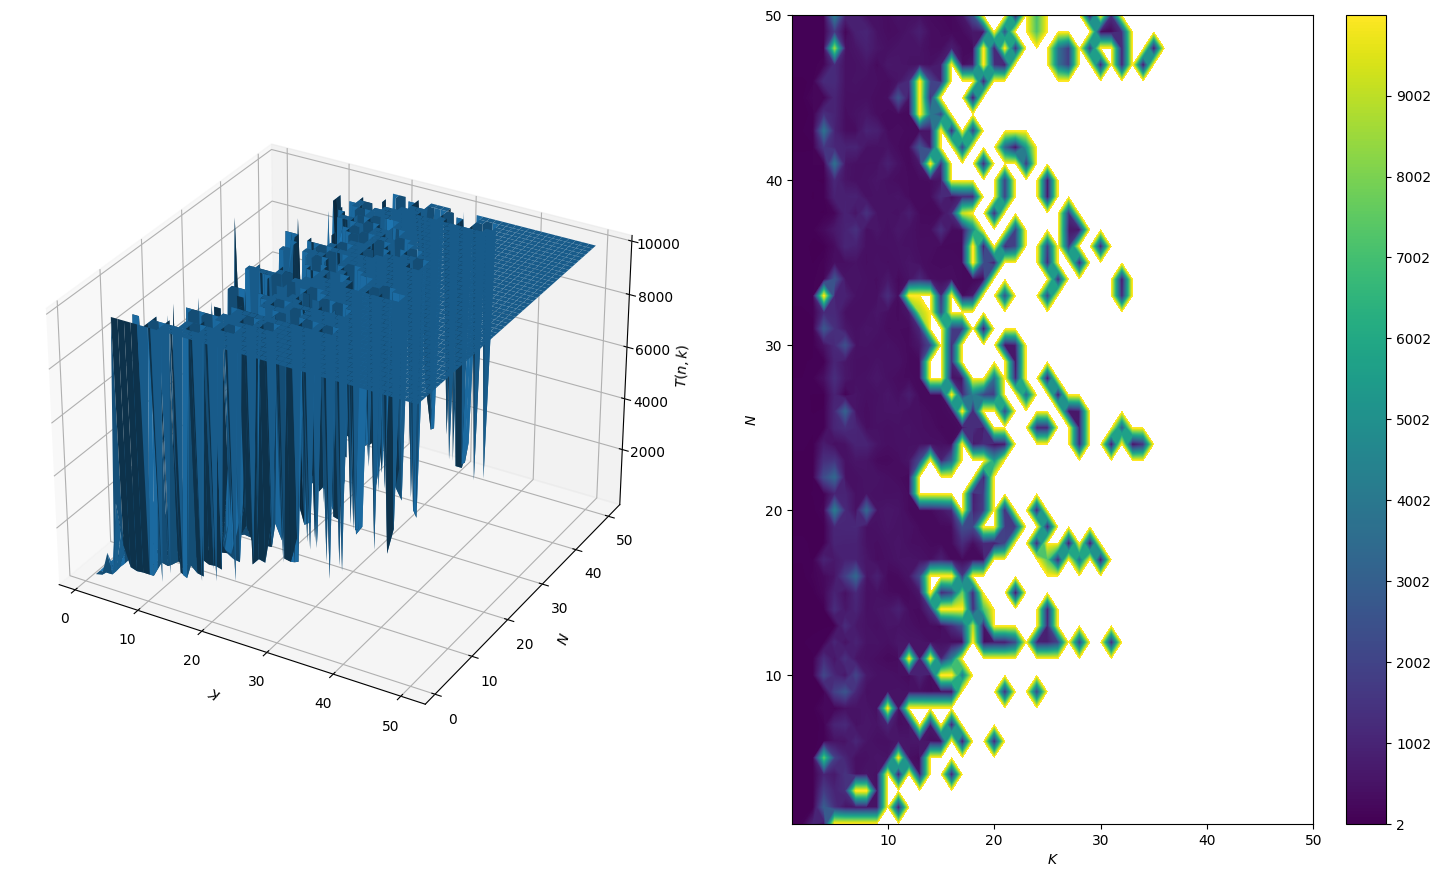

In [ ]:
def Get_T_of_n_k(n, k):
  x0 = np.ones(n, dtype=int)
  A = Function_generator(n, k)
  step = 0.005
  x1, iter_count = step_crushing_custom_grad(10000, Q_func, x0, 0.95, 0.5, 0.01, 0.5, A)

  return iter_count


n = 50
k = 50




iters = np.zeros((n, k))
max_iter_count = 10000

for i in range(1, k + 1):
  for j in range(1, n + 1):
    cur_iter = Get_T_of_n_k(j, i)
    iters[i - 1][j - 1] = cur_iter
print(iters)

def get_plots(N, K, T, filename):
  fig = plt.figure(figsize=plt.figaspect(0.5))
  ax1 = fig.add_subplot(1, 2, 1, projection='3d')
  ax1.set_xlabel('$K$', fontsize=10, rotation=150)
  ax1.set_ylabel('$N$', fontsize=10, rotation=70)
  ax1.set_zlabel(r'$T(n, k)$', fontsize=10, rotation=60)
  ax1.yaxis._axinfo['label']['space_factor'] = 3.0
  surf = ax1.plot_surface(N, K, T)
  ax1 = fig.add_subplot(1, 2, 2)
  c = ax1.contourf(N, K, T, levels=np.arange(T.min(), T.max(), 5))
  cbar = plt.colorbar(c)
  ax1.set_xlabel('$K$', fontsize=10)
  ax1.set_ylabel('$N$', fontsize=10)
  fig.set_size_inches(18.5, 10.5)
  fig.savefig(filename, dpi=100)

max_n = n
max_k = k
N = np.arange(1, max_n + 1, 1)
K = np.arange(1, max_k + 1, 1)
N, K = np.meshgrid(K, N)
get_plots(N, K, iters, 'iterations.png')



Вычислениях происходили очень долго даже для небольших k и n. В попытках ускорить метод, мы подбирали параметры, такие как начальный шаг, дельта и прочие аргументы. В итоге мы добились скорости, которая позволяет вычислить минимальный объем данных. Проведя такие измерения несколько раз, мы не доказали численно, но визуально заметили схожесть результата - при увеличении k число интераций резко возрастает, но в то же время n на это не сильно влияет. Скорее даже получаются некоторые комбинации n и k, которые приводят к наихудшим результатам, а есть наоборот те, которые позволяют решить задачу за отведенное максимальное количество шагов.
Например, на рисунке выше можно заметить некоторые полосы параллельно k - области, где вычисления были успешными.

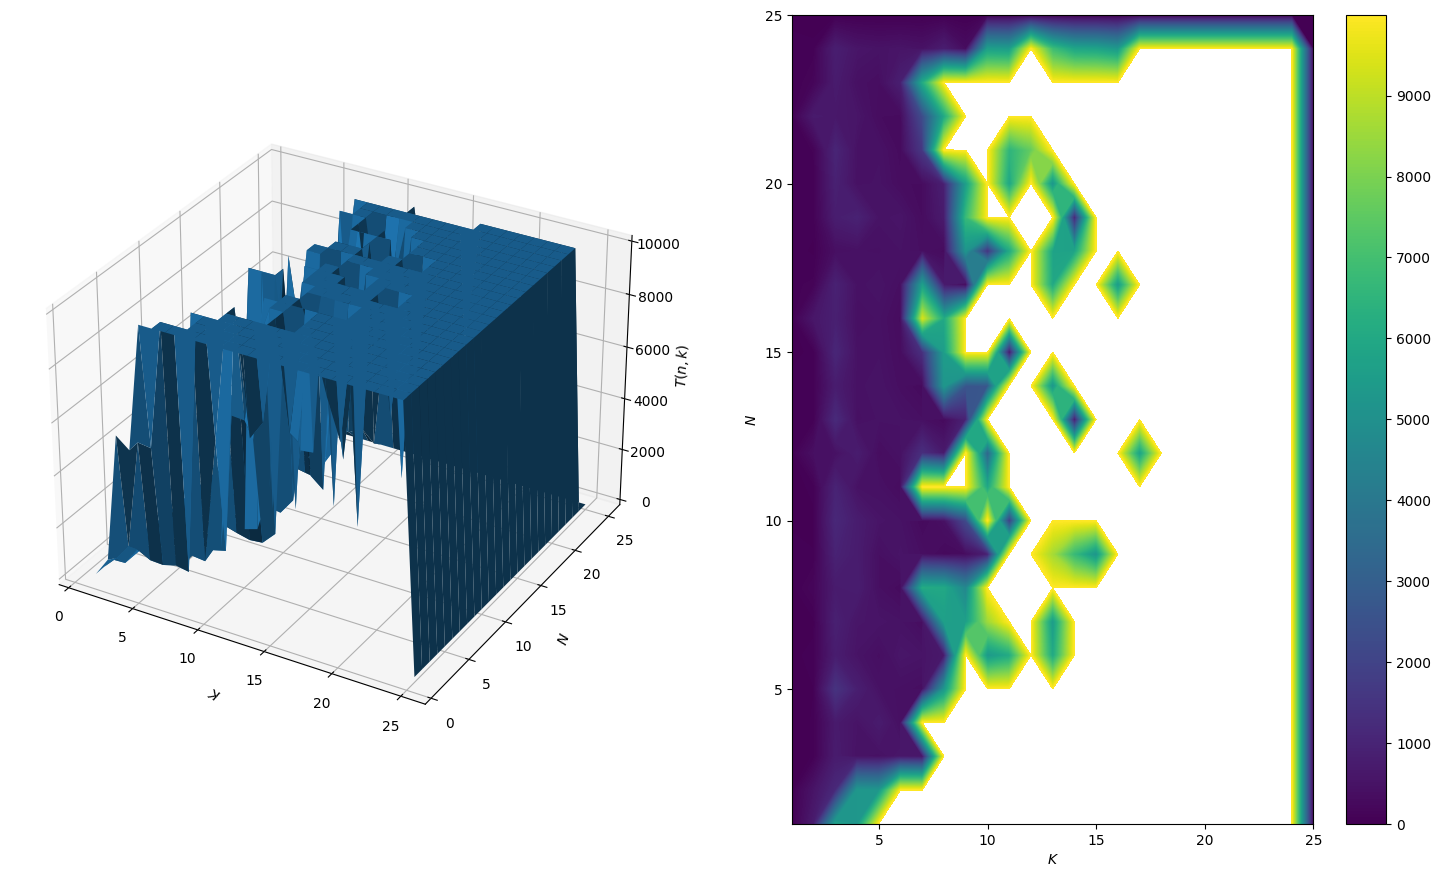

In [ ]:
s = 2
n_s = n // s
k_s = k // s

iter_s = np.zeros((n_s, k_s))
k_c = 0
n_c = 0
for i in range(0, k - s, s):
  for j in range(0, n - s, s):
    cur_iter_set = []
    for a in range(s):
      for b in range(s):
        cur_iter_set.append(iters[i + a][j + b])
    cur_iter_set.remove(max(cur_iter_set))
    cur_iter_set.remove(min(cur_iter_set))
    # iter_s[k_c][n_c] = max(cur_iter_set)
    iter_s[k_c][n_c] = sum(cur_iter_set) / len(cur_iter_set)
    n_c += 1
  k_c += 1
  n_c = 0

# print(iter_s)
max_n = n_s
max_k = k_s
N = np.arange(1, max_n + 1, 1)
K = np.arange(1, max_k + 1, 1)
N, K = np.meshgrid(K, N)

get_plots(N, K, iter_s, 'iterations_s.png')



В попытках сделать картину более наглядной, на двумерных интервалах были усреднены значения и отброшены максимальные и минимальные значения, из соображений, что это аномалии.

Вывод: теория о том, что с ростом числа обусловленности замедляется минимизация функции подтвердилась. Но результаты получились не такими очевидеыми относительно n, потому что оказывают влиняе много факторов - таких как начальная точка, начальных шаг, уровень точности и тд